#  World percentage of women at OGs

A real-world regression dataset. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd

#import data set

dataset = pd.read_csv('ArabWomenCandidatesPerYear.csv') # this will automatically name your columns if your csv has headers

#if your csv does not have headers:
#df.columns = ['Bad Indicator', 'ColumnName1', 'ColumnName2',..]

x = dataset["YEAR"].values
y = dataset["ARAB_FEM_PERC"] .values

#X = df["YEAR"]   #Feature Matrix
#Y = df["WORLD_FEM_PERC"]          #Target Variable

#df.head()

sport= [x,y]
print("Data : " ,sport)

Data :  [array([1936, 1948, 1960, 1964, 1972, 1976, 1980, 1984, 1988, 1992, 1994,
       1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016],
      dtype=int64), array([ 0.68965517,  0.07147963,  0.48192771,  3.49794239,  1.03092784,
        4.11449016,  4.        ,  5.36082474,  7.05521472, 19.86035687,
       39.60880196, 23.85261797, 48.0994152 , 30.58618688, 53.35051546,
       26.87609075, 51.52722444, 34.12969283, 55.4517134 , 36.03603604,
       44.26934097, 36.29392971])]


# Split in training and test set

In [4]:
from sklearn.model_selection import train_test_split

X_train_nointerac, X_test_nointerac, y_train, y_test = train_test_split(x, y, random_state=0)
print (X_train_nointerac)
print( y_train)

[1996 2012 1988 1980 2006 1972 1960 1976 2008 1992 1984 2010 1964 1936
 2004 1998]
[23.85261797 36.03603604  7.05521472  4.         51.52722444  1.03092784
  0.48192771  4.11449016 34.12969283 19.86035687  5.36082474 55.4517134
  3.49794239  0.68965517 26.87609075 48.0994152 ]


# Features Engineering 

## Polynomials

To enrich a feature representation, particularly for linear models, we can add interaction features and polynomial features of the original data.

In the following code we extract polynomial features and interactions up to a degree of 2, which means
that we look at all features that are the product of up to two original features.The exact correspondence between input and output features can be found using the
get_feature_names method

You can see that the first column of X_poly corresponds exactly to X, while the other
columns are the powers of the first entry. It’s interesting to see how large some of the
values can get. The second column has entries above 20,000, orders of magnitude different
from the rest.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Change shape as fit support only 2D arays for X
X_train_nointerac=X_train_nointerac.reshape(-1,1)
X_test_nointerac=X_test_nointerac.reshape(-1,1)

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train_nointerac)
X_train_poly = poly.transform(X_train_nointerac)
X_test_poly = poly.transform(X_test_nointerac)

print("X_train.shape: {}".format(X_train_nointerac.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

NameError: name 'X_train' is not defined

# Model

## Linear regression 

Also called ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize
the mean squared error between predictions : 

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

and the true regression targets, y,on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute

Using polynomial features together with a linear regression model yields the classical
model of polynomial regression

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_poly, y_train)

# Change shape as fit support only 2D arays for X
X=x.reshape(-1,1)

line_poly = poly.transform(X)


## Change shape as fit support only 2D arays for X
#X_train_nointerac=X_train_nointerac.reshape(-1,1)
#X_test_nointerac=X_test_nointerac.reshape(-1,1)

#lr = LinearRegression().fit(X_train_nointerac, y_train)

In [7]:
print("reg.coef_: {}".format(reg.coef_))
print("reg.intercept_: {}".format(reg.intercept_))

reg.coef_: [-6.34768523e+02  3.06889088e-01 -4.92858815e-05]
reg.intercept_: 436298.0350516132


The following discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control
complexity.

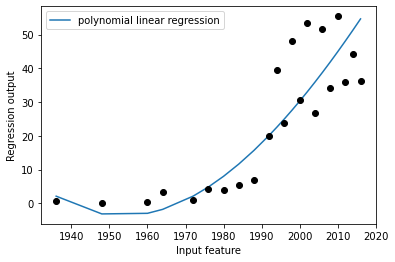

In [8]:
plt.plot(x, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(x, y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [86]:
print("Training set score: {:.2f}".format(reg.score(X_train_poly, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test_poly, y_test)))

Training set score: 0.98
Test set score: 0.85


# Model

## Kernel SVC

In order to obtain nonlinear regression   models for datasets like wave dataset that present a nonlinear function between the data (x) and the target (y), one can use feature engineering. It consists in adding nonlinear features to the representation of our data,
making linear models to fit nonlinear functions (as for instance it is possible to separate data using a plane in 3D features space instead of a line in 2D features space). 

However, often we don’t know which features
to add, and adding many features (like all possible interactions in a 100-
dimensional feature space) might make computation very expensive. Luckily, there is
a clever mathematical trick that allows us to learn a nonlinear function in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the kernel trick, and it works by directly computing the distance (more precisely,
the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.

During training, the algorithm learns the support vectors and their importance (stored in the dual_coef_ attribute of SVC). Thus, predictions for a new data points is made via measuring the distance from the support vectors. This distance can be defined via the Gaussian kernel:

k_rbf(x1, x2) = exp (ɣ*ǁx1 - x2ǁ^2)

Here, x1 and x2 are data points, ǁ x1 - x2 ǁ denotes Euclidean distance, and ɣ (gamma)
is a parameter that controls the width of the Gaussian kernel. It determines the scale of what it
means for points to be close together. 

The C parameter, instead, is a regularization parameter,
similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_)

By default, C=1 and gamma=1/n_features

#### Advantages of SVM
Good for smaller cleaner datasets.
Accurate results.
Useful for both linearly separable data and non – linearly separable data.
Effective in high dimensional spaces.
#### Disadvantages of SVM
Not suitable for large datasets, as the training time can be too much.
Not so effective on a dataset with overlapping classes.
Picking the right kernel can be computationally intensive.
#### Applications of SVM
Sentiment analysis.
Spam Detection.
Handwritten digit recognition.
Image recognition challenges.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

svr = SVR()
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVR())])
param_grid = {'svm__C': [100], 'svm__gamma': [0.001]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_nointerac, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test_nointerac, y_test)))
print("Best parameters: {}".format(grid.best_params_))
 
    # Note that the for gamma=0.001 and C=100 the test set score is 0.03  ( 3% )

Best cross-validation accuracy: -0.39
Test set score: -1.48
Best parameters: {'svm__C': 100, 'svm__gamma': 0.001}


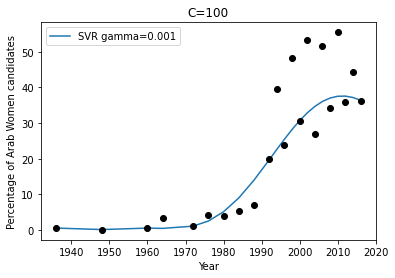

In [16]:
from sklearn.svm import SVR
for gamma in [0.001]:
   svr = SVR(kernel='rbf', C=100,gamma=gamma).fit(X, y)
   plt.plot(X, svr.predict(X), label='SVR gamma={}'.format(gamma))

plt.plot(X, y, 'o', c='k')
plt.xlabel("Year")
plt.ylabel("Percentage of Arab Women candidates")
plt.title("C=100")
plt.legend()